# Introduction

I will simulate weights on individual companies within a given portfolio to obtain an understanding on what return to risk is desired by the individual.

I picked 10 companies that are spread out in their corresponding Industries such that we have a relatively "low" correlation with each other.

# Companies
### Google | NVIDIA | Facebook 
### Gold | Invesco QQQ Trust | COKE  
### Fidelity Series Floating Rate Hi Inc (FFHCX) Bond | Crude Oil | Catepillar
### Southwest Airlines


In [4]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import yfinance as yf

# 1.Data collection 

In [5]:
def get_historical_data(tickers):
    close_df=pd.DataFrame()
    end_date=datetime(2023,10,10)
    start_date=datetime(2012,10,10)
    for ticker in tickers:
        data=yf.download(ticker,start=start_date,end=end_date)
        close_df[ticker]=data["Close"]
    return close_df

In [6]:
ticks = ["GOOG", "NVDA", "Meta", "GC=F","FFHCX", "CL", "LUV", "QQQ", "COKE", "CAT"]
d=get_historical_data(ticks)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
d

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2012-10-10,18.544491,3.167500,19.639999,1763.199951,10.70,53.845001,8.770000,66.919998,68.660004,83.160004
2012-10-11,18.716845,3.185000,19.750000,1768.800049,10.71,54.014999,8.710000,66.709999,69.269997,82.849998
2012-10-12,18.549223,3.157500,19.520000,1758.000000,10.72,53.945000,8.840000,66.680000,69.010002,82.820000
2012-10-15,18.455324,3.197500,19.520000,1736.000000,10.72,54.230000,8.890000,67.169998,69.940002,82.809998
2012-10-16,18.547977,3.290000,19.480000,1744.699951,10.72,54.294998,8.880000,68.120003,70.000000,84.959999
...,...,...,...,...,...,...,...,...,...,...
2023-10-03,133.300003,435.170013,300.940002,1824.599976,9.00,70.470001,26.809999,354.920013,633.919983,268.970001
2023-10-04,136.270004,440.410004,305.579987,1818.500000,8.99,70.559998,27.200001,359.750000,645.000000,265.029999
2023-10-05,135.990005,446.880005,304.790009,1816.599976,8.98,69.269997,27.320000,358.690002,632.289978,260.799988


In [8]:
d.tail()

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2023-10-03,133.300003,435.170013,300.940002,1824.599976,9.00,70.470001,26.809999,354.920013,633.919983,268.970001
2023-10-04,136.270004,440.410004,305.579987,1818.500000,8.99,70.559998,27.200001,359.750000,645.000000,265.029999
2023-10-05,135.990005,446.880005,304.790009,1816.599976,8.98,69.269997,27.320000,358.690002,632.289978,260.799988
2023-10-06,138.729996,457.619995,315.429993,1830.199951,8.98,69.430000,27.080000,364.700012,642.119995,266.040009
2023-10-09,139.500000,452.730011,318.359985,1849.500000,8.99,69.309998,26.500000,366.559998,640.260010,271.299988


In [9]:
d.head()

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2012-10-10,18.544491,3.1675,19.639999,1763.199951,10.70,53.845001,8.77,66.919998,68.660004,83.160004
2012-10-11,18.716845,3.1850,19.750000,1768.800049,10.71,54.014999,8.71,66.709999,69.269997,82.849998
2012-10-12,18.549223,3.1575,19.520000,1758.000000,10.72,53.945000,8.84,66.680000,69.010002,82.820000
2012-10-15,18.455324,3.1975,19.520000,1736.000000,10.72,54.230000,8.89,67.169998,69.940002,82.809998
2012-10-16,18.547977,3.2900,19.480000,1744.699951,10.72,54.294998,8.88,68.120003,70.000000,84.959999


In [10]:
d.shape

(2766, 10)

In [11]:
# Called dT (DataTest)
dT = d.iloc[d.shape[0] - 252:,:] # Data test

# Update the "Training Dataset"
d = d.iloc[:d.shape[0] - 252,:] # Data Train for the Simulation

print("Testing Data dimensions: ", dT.shape)
print("Training Data dimensions:", d.shape)

Testing Data dimensions:  (252, 10)
Training Data dimensions: (2514, 10)


In [12]:
dT

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2022-10-07,99.570000,120.760002,133.449997,1700.500000,8.77,68.989998,31.870001,269.100006,439.399994,177.550003
2022-10-10,98.709999,116.699997,133.789993,1667.300049,8.77,68.480003,31.660000,266.410004,448.190002,178.669998
2022-10-11,98.050003,115.860001,128.539993,1678.699951,8.75,69.050003,31.410000,262.750000,443.829987,179.750000
2022-10-12,98.300003,115.000000,127.500000,1670.300049,8.75,69.110001,31.590000,262.660004,440.420013,179.500000
2022-10-13,99.709999,119.599998,130.289993,1670.000000,8.73,71.010002,32.430000,268.820007,457.000000,183.139999
...,...,...,...,...,...,...,...,...,...,...
2023-10-03,133.300003,435.170013,300.940002,1824.599976,9.00,70.470001,26.809999,354.920013,633.919983,268.970001
2023-10-04,136.270004,440.410004,305.579987,1818.500000,8.99,70.559998,27.200001,359.750000,645.000000,265.029999
2023-10-05,135.990005,446.880005,304.790009,1816.599976,8.98,69.269997,27.320000,358.690002,632.289978,260.799988


In [13]:
d

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2012-10-10,18.544491,3.167500,19.639999,1763.199951,10.70,53.845001,8.770000,66.919998,68.660004,83.160004
2012-10-11,18.716845,3.185000,19.750000,1768.800049,10.71,54.014999,8.710000,66.709999,69.269997,82.849998
2012-10-12,18.549223,3.157500,19.520000,1758.000000,10.72,53.945000,8.840000,66.680000,69.010002,82.820000
2012-10-15,18.455324,3.197500,19.520000,1736.000000,10.72,54.230000,8.890000,67.169998,69.940002,82.809998
2012-10-16,18.547977,3.290000,19.480000,1744.699951,10.72,54.294998,8.880000,68.120003,70.000000,84.959999
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,96.150002,121.389999,135.679993,1662.400024,8.70,70.250000,30.840000,267.260010,411.730011,164.080002
2022-10-03,99.300003,125.120003,138.610001,1692.900024,8.71,71.110001,31.219999,273.529999,429.000000,171.229996
2022-10-04,102.410004,131.669998,140.279999,1721.099976,8.77,71.839996,33.189999,282.130005,439.929993,179.630005


# 2. Understanding Returns

### To change the time period just multiply 1/5/10 infront of 252 wherever found

In [14]:
from scipy import stats
expected_returns_a=d.pct_change()
expected_returns_a.columns=ticks
expected_returns_aA=pd.DataFrame(expected_returns_a.mean()*252)
expected_returns_aA=expected_returns_aA.T

dar=d.pct_change().iloc[1:,:]+1
gar=pd.DataFrame(np.prod(dar)**(1/float(10))-1) #using GM instead of AM
full_return_annual=(pd.concat([expected_returns_aA.T,gar],axis=1))

full_return_annual.columns = ["Average Arithmetic Returns", "Average Geometric Returns"] 
display("Expected Annual Returns ", expected_returns_aA)
display("dar", dar)
display("Full Annual Return", full_return_annual)

'Expected Annual Returns '

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
0,0.206351,0.467853,0.267224,0.009196,-0.019127,0.043306,0.188444,0.165003,0.249724,0.116968


'dar'

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2012-10-11,1.009294,1.005525,1.005601,1.003176,1.000935,1.003157,0.993158,0.996862,1.008884,0.996272
2012-10-12,0.991044,0.991366,0.988354,0.993894,1.000934,0.998704,1.014925,0.999550,0.996247,0.999638
2012-10-15,0.994938,1.012668,1.000000,0.987486,1.000000,1.005283,1.005656,1.007348,1.013476,0.999879
2012-10-16,1.005020,1.028929,0.997951,1.005011,1.000000,1.001199,0.998875,1.014143,1.000858,1.025963
2012-10-17,1.014489,0.992401,1.020534,1.003898,1.000000,1.018234,1.007883,0.999413,0.999143,1.019656
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.980222,0.993372,0.994648,1.002352,1.000000,0.978821,0.974716,0.983043,0.982790,0.989030
2022-10-03,1.032761,1.030727,1.021595,1.018347,1.001149,1.012242,1.012322,1.023460,1.041945,1.043576
2022-10-04,1.031319,1.052350,1.012048,1.016658,1.006889,1.010266,1.063101,1.031441,1.025478,1.049057


'Full Annual Return'

,Average Arithmetic Returns,Average Geometric Returns
GOOG,0.206351,0.186153
NVDA,0.467853,0.451292
Meta,0.267224,0.216212
GC=F,0.009196,-0.002960
FFHCX,-0.019127,-0.019694
CL,0.043306,0.025939
LUV,0.188444,0.140097
QQQ,0.165003,0.153780
COKE,0.249724,0.204058
CAT,0.116968,0.079562


# 3.Equations Utilized

## Measuring the Adjusted Risk of Return
Measures the risk adjusted rate of return of a portfolio.
$$
\begin{aligned}
Sharpe Ratio = \frac{R_p - R_f}{\sigma_p}
\end{aligned}
$$
$\sigma_p$ = Standard Deviation of Portfolio \
$R_p$ = Return of Portfolio \
$R_f$ = Return of Risk Free Instrument
\
Rule of Thumb: 
Sharpe Ratio < 1 sub-optimal... There is most likely a better option \
Sharpe Ratio > 1 is acceptable \
Sharpe Ratio > 2 is VERY good \
Sharpe Ratio > 3 is EXCELLENT! 

# Volatility
$$
\begin{aligned}
\sum_{i=0}^N \sum_{j=0}^N {\sigma_{ij}}{X_i X}
\end{aligned}
$$
$X$ = Weights in Portfolio \
$\sigma_{ij}$ = Variance - Covariance Matrix

# Expected Return
$$
\begin{aligned}
\sum_{i=0}^N X_i \mu_i
\end{aligned}
$$
\
$X$ = Weights in Porfolio \
$\mu_i$ = Arithmetic Average Rate of Return for $i^{th}$ security

In [15]:
portfolio_returns=[]
portfolio_volatility=[]
sharpe_ratio=[]

stock_weights=[]

num_assets=len(ticks)
num_portfolios=10000

daily_returns=d.pct_change()

annual_returns=(daily_returns.mean()*252)+1

cov_daily=daily_returns.cov()
cov_annual=cov_daily*252

print(annual_returns)

GOOG     1.206351
NVDA     1.467853
Meta     1.267224
GC=F     1.009196
FFHCX    0.980873
CL       1.043306
LUV      1.188444
QQQ      1.165003
COKE     1.249724
CAT      1.116968
dtype: float64


In [16]:
cov_daily

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
GOOG,0.000280,0.000245,2.280720e-04,-1.681823e-06,1.011164e-05,0.000066,0.000126,0.000173,0.000090,0.000119
NVDA,0.000245,0.000752,2.892756e-04,3.690409e-06,1.242205e-05,0.000074,0.000173,0.000256,0.000122,0.000175
Meta,0.000228,0.000289,5.640319e-04,-1.416065e-07,1.020969e-05,0.000062,0.000136,0.000201,0.000103,0.000113
GC=F,-0.000002,0.000004,-1.416065e-07,9.631266e-05,7.090521e-07,0.000006,-0.000009,0.000001,0.000005,0.000002
FFHCX,0.000010,0.000012,1.020969e-05,7.090521e-07,6.430327e-06,0.000006,0.000015,0.000010,0.000008,0.000012
CL,0.000066,0.000074,6.153016e-05,6.281037e-06,6.128765e-06,0.000140,0.000059,0.000069,0.000073,0.000060
LUV,0.000126,0.000173,1.358588e-04,-9.466619e-06,1.477222e-05,0.000059,0.000451,0.000126,0.000126,0.000159
QQQ,0.000173,0.000256,2.009374e-04,1.480524e-06,9.982534e-06,0.000069,0.000126,0.000170,0.000093,0.000121
COKE,0.000090,0.000122,1.027123e-04,4.658363e-06,7.644730e-06,0.000073,0.000126,0.000093,0.000496,0.000095
CAT,0.000119,0.000175,1.128949e-04,1.830543e-06,1.154008e-05,0.000060,0.000159,0.000121,0.000095,0.000318


In [17]:
cov_annual

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
GOOG,0.070617,0.061720,0.057474,-0.000424,0.002548,0.016630,0.031775,0.043700,0.022744,0.030081
NVDA,0.061720,0.189421,0.072897,0.000930,0.003130,0.018597,0.043533,0.064446,0.030776,0.044075
Meta,0.057474,0.072897,0.142136,-0.000036,0.002573,0.015506,0.034236,0.050636,0.025883,0.028450
GC=F,-0.000424,0.000930,-0.000036,0.024271,0.000179,0.001583,-0.002386,0.000373,0.001174,0.000461
FFHCX,0.002548,0.003130,0.002573,0.000179,0.001620,0.001544,0.003723,0.002516,0.001926,0.002908
CL,0.016630,0.018597,0.015506,0.001583,0.001544,0.035292,0.014993,0.017394,0.018510,0.015211
LUV,0.031775,0.043533,0.034236,-0.002386,0.003723,0.014993,0.113655,0.031830,0.031761,0.040158
QQQ,0.043700,0.064446,0.050636,0.000373,0.002516,0.017394,0.031830,0.042860,0.023476,0.030547
COKE,0.022744,0.030776,0.025883,0.001174,0.001926,0.018510,0.031761,0.023476,0.125002,0.023936
CAT,0.030081,0.044075,0.028450,0.000461,0.002908,0.015211,0.040158,0.030547,0.023936,0.080084


In [18]:
np.random.seed(3) #setting seed to maintain records

for i in range(num_portfolios):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    returns=(np.dot(weights,(annual_returns)))
    volatility=np.sqrt(np.dot(weights.T,np.dot(cov_annual,weights)))
    
    sharpe=(returns-1.03)/volatility #3% risk free rate
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns-1)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)

In [19]:
portfolio={'Returns':portfolio_returns,
          'Volatility':portfolio_volatility,
          "Sharpe Ratio":sharpe_ratio}
for counter,symbol in enumerate(ticks):
    portfolio[symbol+" Weight"]=[Weight[counter] for Weight in stock_weights]
    
df=pd.DataFrame(portfolio)
df

,Returns,Volatility,Sharpe Ratio,GOOG Weight,NVDA Weight,Meta Weight,GC=F Weight,FFHCX Weight,CL Weight,LUV Weight,QQQ Weight,COKE Weight,CAT Weight
0,0.143617,0.149097,0.762030,0.117817,0.151475,0.062225,0.109267,0.191004,0.191719,0.026863,0.044330,0.011009,0.094290
1,0.157060,0.161841,0.785093,0.007585,0.115987,0.164814,0.070706,0.171697,0.150017,0.006089,0.141890,0.065823,0.105392
2,0.173852,0.175208,0.821036,0.059669,0.145874,0.092695,0.033013,0.114624,0.164221,0.064476,0.046712,0.081650,0.197066
3,0.193037,0.183852,0.886788,0.172284,0.118690,0.159369,0.149293,0.066724,0.016278,0.115341,0.098471,0.063824,0.039727
4,0.157508,0.162509,0.784617,0.093302,0.107628,0.061793,0.066970,0.105045,0.197504,0.134553,0.065064,0.063799,0.104342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.178852,0.174717,0.851959,0.105488,0.115081,0.040025,0.151156,0.016422,0.079431,0.159229,0.181970,0.077701,0.073496
9996,0.143634,0.155014,0.733055,0.022259,0.026764,0.167625,0.223695,0.022429,0.181661,0.159996,0.063758,0.121594,0.010218
9997,0.177805,0.163025,0.906639,0.014708,0.151248,0.067777,0.175140,0.127864,0.046395,0.139190,0.058863,0.174651,0.044163
9998,0.156717,0.168626,0.751468,0.216791,0.071197,0.129409,0.143549,0.046229,0.145387,0.041244,0.082936,0.011187,0.112071


# 4.Plotting the efficient frontier

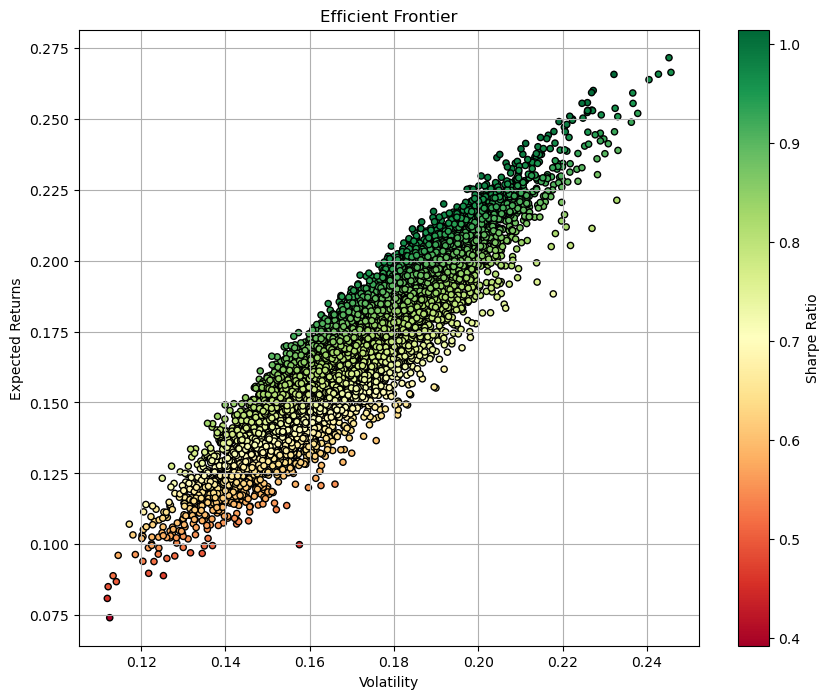

In [20]:
import matplotlib.pyplot as plt

df.plot.scatter(x='Volatility',
               y="Returns",
               c="Sharpe Ratio",
               cmap="RdYlGn",
               edgecolors="black",
               figsize=(10,8),
               grid=True)

plt.xlabel("Volatility")
plt.ylabel("Expected Returns")
plt.title("Efficient Frontier")
plt.show()

# 5.Forming Different Risk Profiles 

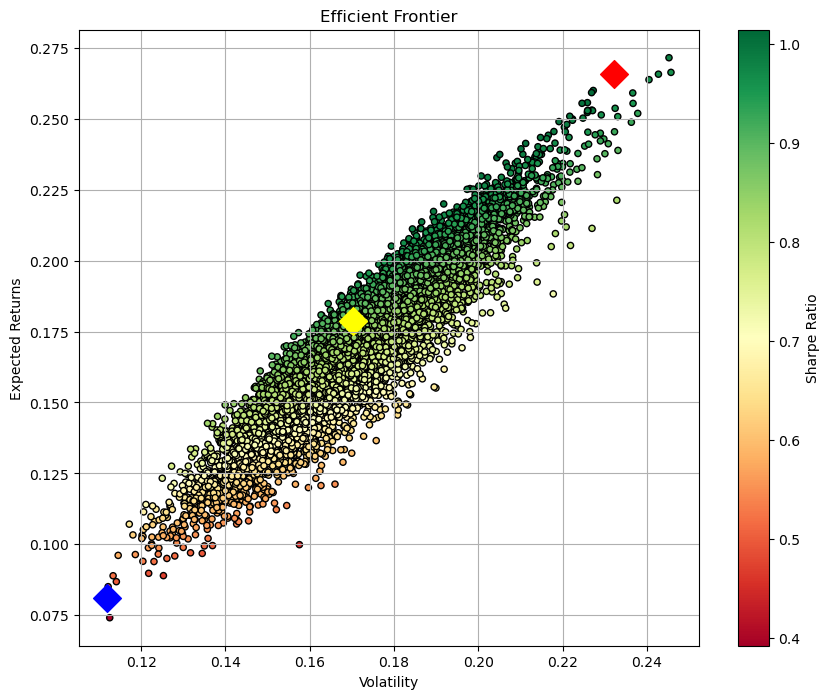

In [21]:
# Finding the Optimal Portfolio
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
mid_risk=df["Volatility"].median()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
mid_risk_port=df.loc[(df["Volatility"]<mid_risk+0.00005) & (df["Volatility"]>mid_risk-0.00005)]
mid_risk_max_ret=mid_risk_port['Returns'].max()
mid_risk_port= mid_risk_port.loc[mid_risk_port['Returns'] == mid_risk_max_ret]

# plot frontier, max sharpe & min Volatility values with a scatterplot
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.scatter(x=mid_risk_port['Volatility'], y=mid_risk_port['Returns'], c='yellow', marker='D', s=200 )
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [22]:
# Additional Details
r_ef = pd.concat([min_variance_port.T,sharpe_portfolio.T,mid_risk_port.T], axis = 1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values","Mid Risk Adjusted Values"]
display(r_ef)

,Minimum Risk Adjusted Values,Max Risk Adjusted Values,Mid Risk Adjusted Values
Returns,0.080959,0.265613,0.178861
Volatility,0.111953,0.232207,0.170320
Sharpe Ratio,0.455177,1.014665,0.874006
GOOG Weight,0.063778,0.158786,0.043157
NVDA Weight,0.038015,0.239941,0.167466
Meta Weight,0.039210,0.175497,0.123204
GC=F Weight,0.276047,0.007097,0.106007
FFHCX Weight,0.143761,0.057735,0.109878
CL Weight,0.279773,0.007009,0.152523
LUV Weight,0.017166,0.013605,0.034499


<Axes: >

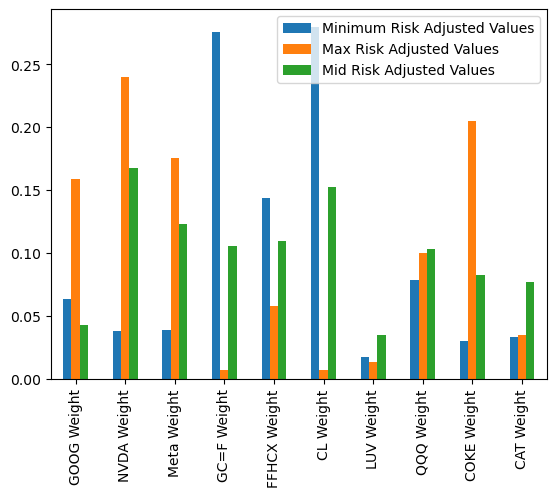

In [23]:
r_ef.iloc[3:,:].plot(kind="bar")

# 6.Practically Analysing Returns Over Unfamiliar Data of 1 next year i.e. test data

In [24]:
amount_invest = 1000
expected_return = pd.DataFrame(amount_invest * (1+r_ef.iloc[0,:]))
print("----------------------------------------------------------------")
print("                Expected Returns on my Portfolio")
print("----------------------------------------------------------------")
print(expected_return.T)
print("")
print("----------------------------------------------------------------")
print("If I invested", amount_invest,"USD on |", dT.index[0],"| I would have...")
actual_return = (dT.iloc[dT.shape[0]-1,:] - dT.iloc[0,:]) / ( dT.iloc[0,:])
# Multipling the weights to the price at the beginning of the year
beg_price = (dT.iloc[0,:])
end_price = dT.iloc[dT.shape[0]-1,:]
print("----------------------------------------------------------------")
# Weights derived from the Efficient Frontier Portfolio
# Weights for Minimum Risk
w = np.array(r_ef.iloc[3:,0])

percentage_change = (end_price - beg_price)/(beg_price)+1
print("Using the Portfolio Weights for Minimum Risk Return Portfolio")
money_left = sum(w * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ",round(money_left, 2))
print("")
print("----------------------------------------------------------------")
print("Using the Portfolio Weights Maximized Risk-Return Portfolio")
# Weights for Maxmimum Risk
w1 = np.array(r_ef.iloc[3:,1])

money_left1 = sum(w1 * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ", round(money_left1,2))
print("")
# Weights for Mid Risk
print("----------------------------------------------------------------")
print("Using the Portfolio Weights Balanced Risk-Return Portfolio")
w2 = np.array(r_ef.iloc[3:,2])

money_left2 = sum(w2 * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ", round(money_left1,2))
print("")


----------------------------------------------------------------
                Expected Returns on my Portfolio
----------------------------------------------------------------
         Minimum Risk Adjusted Values  Max Risk Adjusted Values  \
Returns                   1080.958657               1265.612523   

         Mid Risk Adjusted Values  
Returns               1178.860754  

----------------------------------------------------------------
If I invested 1000 USD on | 2022-10-07 00:00:00 | I would have...
----------------------------------------------------------------
Using the Portfolio Weights for Minimum Risk Return Portfolio

    Starting balance $ 1000 : Ending with $  1270.53

----------------------------------------------------------------
Using the Portfolio Weights Maximized Risk-Return Portfolio

    Starting balance $ 1000 : Ending with $  2114.78

----------------------------------------------------------------
Using the Portfolio Weights Balanced Risk-Return Portfo

# Setting up the weights for analysis 

In [25]:
weights = np.array(r_ef.iloc[3:,:])
a=[]
for i in range(3):
    a.append(weights[:,i])

weights=a
weights

[array([0.06377818, 0.03801477, 0.03921014, 0.27604725, 0.14376056,
        0.27977326, 0.01716594, 0.07883234, 0.02990313, 0.03351445]),
 array([0.15878625, 0.23994149, 0.17549657, 0.00709709, 0.05773544,
        0.0070093 , 0.01360547, 0.10028089, 0.20518623, 0.03486127]),
 array([0.04315736, 0.16746628, 0.12320388, 0.10600688, 0.10987816,
        0.15252269, 0.03449937, 0.1036178 , 0.08234732, 0.07730025])]

# 7. Backtesting : Checking the above returns for 1,5,10 years

In [26]:
def Backtest(data,years,wlist):
    daily_returns=data.pct_change()
    annual_returns=(daily_returns.mean()*252)+1
    cov_daily=daily_returns.cov()
    cov_annual=cov_daily*252
    weights=wlist
    volatility=np.sqrt(np.dot(weights.T,np.dot(cov_annual,weights)))
    returns=(np.dot(weights,(annual_returns)))
    sharpe=(returns-1.03)/volatility
    money_final=sum(weights * annual_returns)
    
    return sharpe,money_final

### i)For 1 year

In [27]:
back_data=d.iloc[d.shape[0]-252:,:]

In [28]:
risk_profiles=["min","max","mid"]
for i in range(3):
        sharpe_back,returns_back=Backtest(back_data,1,weights[i])
        print(f"sharpe={sharpe_back},returns={returns_back},for {risk_profiles[i]}_risk profile")

sharpe=-1.0331934341572242,returns=0.8955136471949712,for min_risk profile
sharpe=-0.715791964975934,returns=0.778523218901692,for max_risk profile
sharpe=-0.8929217909830911,returns=0.8139805922606649,for mid_risk profile


In [29]:
back_data

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2021-10-07,139.185501,210.750000,329.220001,1757.900024,9.30,75.589996,54.040001,362.970001,407.000000,195.750000
2021-10-08,140.056000,208.309998,330.049988,1756.300049,9.30,75.589996,53.919998,361.160004,405.000000,195.160004
2021-10-11,138.847504,206.949997,325.450012,1754.599976,9.30,75.800003,51.669998,358.390015,399.220001,192.889999
2021-10-12,136.712997,206.710007,323.769989,1758.300049,9.30,75.669998,52.180000,357.140015,400.200012,189.919998
2021-10-13,137.899994,209.389999,324.540009,1793.699951,9.30,76.070000,51.250000,360.000000,400.769989,188.940002
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,96.150002,121.389999,135.679993,1662.400024,8.70,70.250000,30.840000,267.260010,411.730011,164.080002
2022-10-03,99.300003,125.120003,138.610001,1692.900024,8.71,71.110001,31.219999,273.529999,429.000000,171.229996
2022-10-04,102.410004,131.669998,140.279999,1721.099976,8.77,71.839996,33.189999,282.130005,439.929993,179.630005


### ii)For 5 year

In [30]:
back_data=d.iloc[d.shape[0]-5*252:,:]

In [31]:
for i in range(3):
        sharpe_back,returns_back=Backtest(back_data,1,weights[i])
        print(f"sharpe={sharpe_back},returns={returns_back},for {risk_profiles[i]}_risk profile")

sharpe=0.3113182810809798,returns=1.070941893446178,for min_risk profile
sharpe=0.5582017989650175,returns=1.1855856092277408,for max_risk profile
sharpe=0.44728808467395376,returns=1.1218651283263734,for mid_risk profile


### iii)For 10 year

In [32]:
back_data=d.iloc[d.shape[0]-10*252:,:]

In [33]:
for i in range(3):
        sharpe_back,returns_back=Backtest(back_data,1,weights[i])
        print(f"sharpe={sharpe_back},returns={returns_back},for {risk_profiles[i]}_risk profile")

sharpe=3.16359364115581,returns=1.7361269461470406,for min_risk profile
sharpe=7.036512870290357,returns=3.2500740547778366,for max_risk profile
sharpe=5.411425344292059,returns=2.5301972619293807,for mid_risk profile


# 8.MCS Convergence plots with given weights

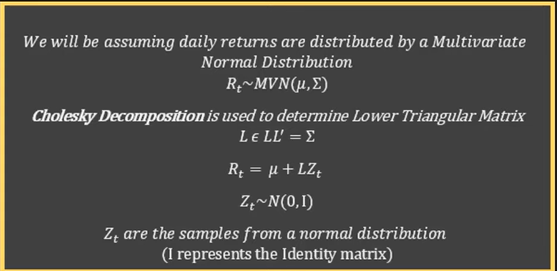

In [34]:
d.shape

(2514, 10)

In [35]:
stockData = d
returns = stockData.pct_change()
meanReturns = returns.mean()
covMatrix = returns.cov()
returns = returns.dropna()

In [36]:
# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days

portfol=[]
for i in weights:
    meanM = np.full(shape=(T, len(i)), fill_value=meanReturns)
    meanM = meanM.T

    portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

    initialPortfolio = 10000

    for m in range(0, mc_sims):
        # MC loops
        Z = np.random.normal(size=(T, len(i)))
        L = np.linalg.cholesky(covMatrix)
        dailyReturns = meanM + np.inner(L, Z)
        portfolio_sims[:,m] = np.cumprod(np.inner(i, dailyReturns.T)+1)*initialPortfolio
    
    portfol.append(portfolio_sims)

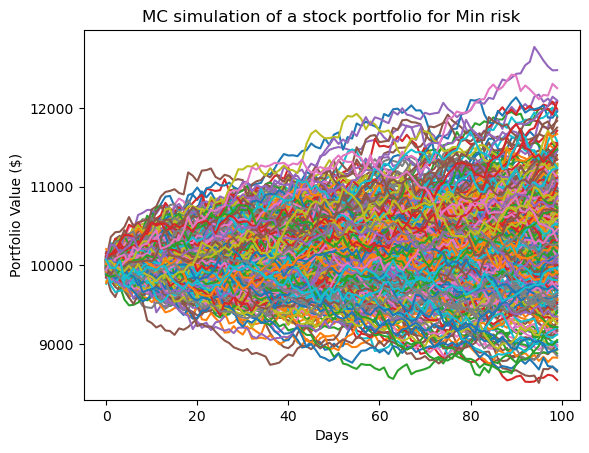

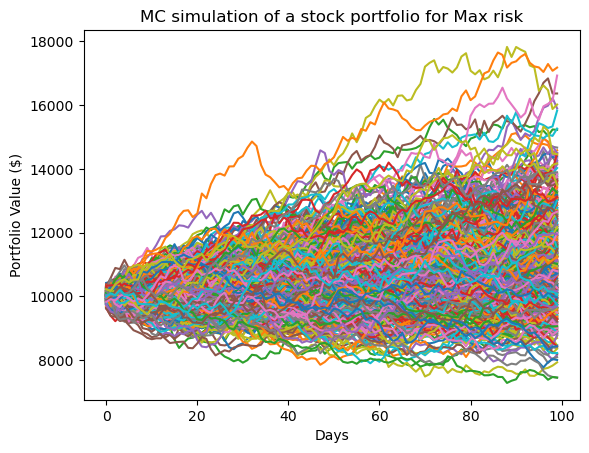

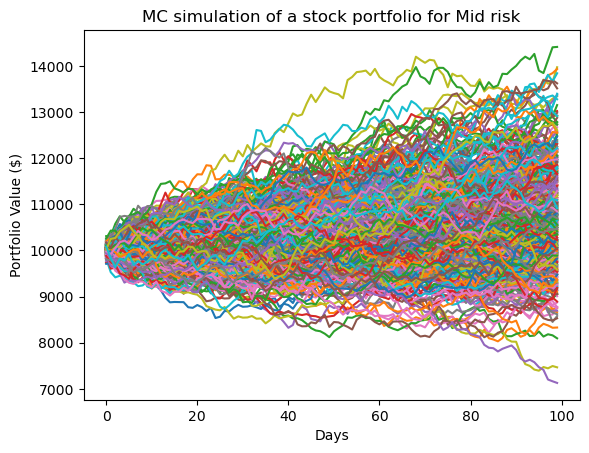

In [37]:
titles=["Min risk","Max risk","Mid risk"]
for i in range(3):
    plt.plot(portfol[i])
    plt.ylabel('Portfolio Value ($)')
    plt.xlabel('Days')
    plt.title(f'MC simulation of a stock portfolio for {titles[i]}')
    plt.show()

# 9.Checking returns of these weights in years when the market was bullish/bearish eg: 2008 crash, 2013 revival/ covid crash and revival 

### i) Bearish Markets- Covid 2020 and 2021 

In [38]:
back_data=d.iloc[d.shape[0]-3*252+90:d.shape[0]-1*252,:]

In [39]:
back_data

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2020-02-18,75.983498,74.142502,217.800003,1600.000000,9.28,76.070000,57.599998,234.729996,277.500000,136.580002
2020-02-19,76.334503,78.675003,217.490005,1607.500000,9.29,75.540001,57.110001,236.979996,276.579987,136.860001
2020-02-20,75.907501,77.175003,214.580002,1616.599976,9.29,75.160004,56.939999,234.779999,273.970001,136.929993
2020-02-21,74.255501,73.517502,210.179993,1644.599976,9.28,76.269997,56.529999,230.270004,273.679993,137.210007
2020-02-24,71.079498,68.320000,200.720001,1672.400024,9.26,74.419998,54.110001,221.389999,265.239990,132.169998
...,...,...,...,...,...,...,...,...,...,...
2021-09-30,133.265503,207.160004,339.390015,1755.300049,9.30,75.580002,51.430000,357.959991,394.179993,191.970001
2021-10-01,136.462494,207.419998,343.010010,1757.000000,9.30,75.580002,54.349998,360.179993,389.359985,194.330002
2021-10-04,133.764999,197.320007,326.230011,1766.199951,9.30,75.059998,55.060001,352.619995,391.279999,193.130005


In [40]:
for i in range(3):
        sharpe_back,returns_back=Backtest(back_data,1,weights[i])
        print(f"sharpe={sharpe_back},returns={returns_back},for {risk_profiles[i]}_risk profile")

sharpe=0.654950916063125,returns=1.1432244111866345,for min_risk profile
sharpe=1.2538220079959925,returns=1.4168742571427784,for max_risk profile
sharpe=1.0502101749998392,returns=1.2837351332776124,for mid_risk profile


### ii) Bullish Markets- Post Covid Revival 2022 and 2023 

In [41]:
data_new=pd.concat([d,dT])

In [42]:
back_data=data_new.iloc[data_new.shape[0]-2*252:,:]

In [43]:
back_data

,GOOG,NVDA,Meta,GC=F,FFHCX,CL,LUV,QQQ,COKE,CAT
Date,,,,,,,,,,
2021-10-07,139.185501,210.750000,329.220001,1757.900024,9.30,75.589996,54.040001,362.970001,407.000000,195.750000
2021-10-08,140.056000,208.309998,330.049988,1756.300049,9.30,75.589996,53.919998,361.160004,405.000000,195.160004
2021-10-11,138.847504,206.949997,325.450012,1754.599976,9.30,75.800003,51.669998,358.390015,399.220001,192.889999
2021-10-12,136.712997,206.710007,323.769989,1758.300049,9.30,75.669998,52.180000,357.140015,400.200012,189.919998
2021-10-13,137.899994,209.389999,324.540009,1793.699951,9.30,76.070000,51.250000,360.000000,400.769989,188.940002
...,...,...,...,...,...,...,...,...,...,...
2023-10-03,133.300003,435.170013,300.940002,1824.599976,9.00,70.470001,26.809999,354.920013,633.919983,268.970001
2023-10-04,136.270004,440.410004,305.579987,1818.500000,8.99,70.559998,27.200001,359.750000,645.000000,265.029999
2023-10-05,135.990005,446.880005,304.790009,1816.599976,8.98,69.269997,27.320000,358.690002,632.289978,260.799988


In [44]:
for i in range(3):
        sharpe_back,returns_back=Backtest(back_data,1,weights[i])
        print(f"sharpe={sharpe_back},returns={returns_back},for {risk_profiles[i]}_risk profile")

sharpe=0.12129602820269,returns=1.0446927580941843,for min_risk profile
sharpe=0.6533879762661107,returns=1.2381380839908898,for max_risk profile
sharpe=0.5301993314346418,returns=1.146045931299066,for mid_risk profile
